<a href="https://colab.research.google.com/github/celesteg21/Instagram_Analytics/blob/main/Instagram_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


url = '/content/top_insta_influencers_data.csv'
df = pd.read_csv(url)

df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [75]:
df.describe()

,rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


# Overall Influence:
The rank of influencers ranges from 1 to 200, with a mean of 100.5 and a standard deviation of 57.88. This indicates that the set of influencers covers a wide range of positions.
The influence score has a mean of 81.82 and a standard deviation of 8.88. Scores range from 22 to 93.
Posts and Followers:
The number of posts has a median of 84, suggesting that half of the influencers have fewer than 84 posts.
The number of followers has a median of 84 million, indicating that half of the influencers have fewer than 84 million followers.

In [9]:
print("Size of Dataset",df.shape)
df.head().style.background_gradient(cmap='PuRd')

Size of Dataset (200, 10)


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,nan
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [96]:
# Check for nulls in the 'channel_info' column
nulls_channel_info = df['channel_info'].isnull().sum()
print(f"Nulls in 'channel_info': {nulls_channel_info}")

# Check for duplicates in the 'channel_info' column
duplicates_channel_info = df.duplicated(subset=['channel_info']).sum()
print(f"Duplicates in 'channel_info': {duplicates_channel_info}")

# Check for nulls in the 'posts' column
nulls_posts = df['posts'].isnull().sum()
print(f"Nulls in 'posts': {nulls_posts}")


Nulls in 'channel_info': 0
Duplicates in 'channel_info': 0
Nulls in 'posts': 0


In [98]:
#code converts the values in the 'Posts' column to integers, handling cases where the values are expressed in thousands ('k' suffix).
#For example, if the original value is '5k', it will be converted to 5000.
df["posts"] = df["posts"].apply(lambda x: int(x) if isinstance(x, int) else (int(x) if "k" not in x else int(float(x.replace("k",""))*1000)))
df["followers"] = df["followers"].apply(lambda x: int(x) if isinstance(x, int) else (int(x) if "m" not in x else int(float(x.replace("m",""))*1000000)))

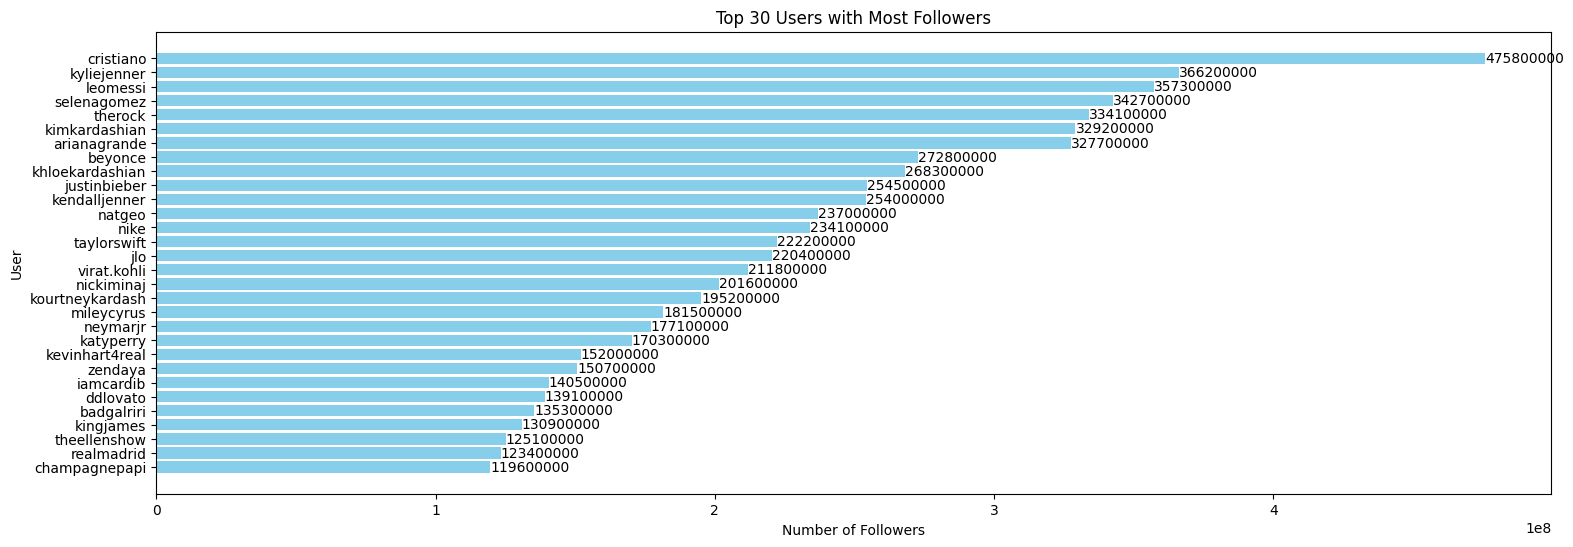

In [101]:
# Extract the top 30 users based on followers
top_30_users = df.sort_values(by='followers', ascending=False).head(30)

# Reverse the order of the data so that users with the most followers are at the top
top_30_users = top_30_users[::-1]

# Create a horizontal bar chart
plt.figure(figsize=(18, 6))
bars = plt.barh(top_30_users['channel_info'], top_30_users['followers'], color='skyblue')  # Use barh for a horizontal chart

# Add labels with the number on the bars
for bar, follower_count in zip(bars, top_30_users['followers']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{follower_count:.0f}', va='center', ha='left')

plt.xlabel('Number of Followers')
plt.ylabel('User')
plt.title('Top 30 Users with Most Followers')
plt.show()


<ipython-input-103-811200d92082>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


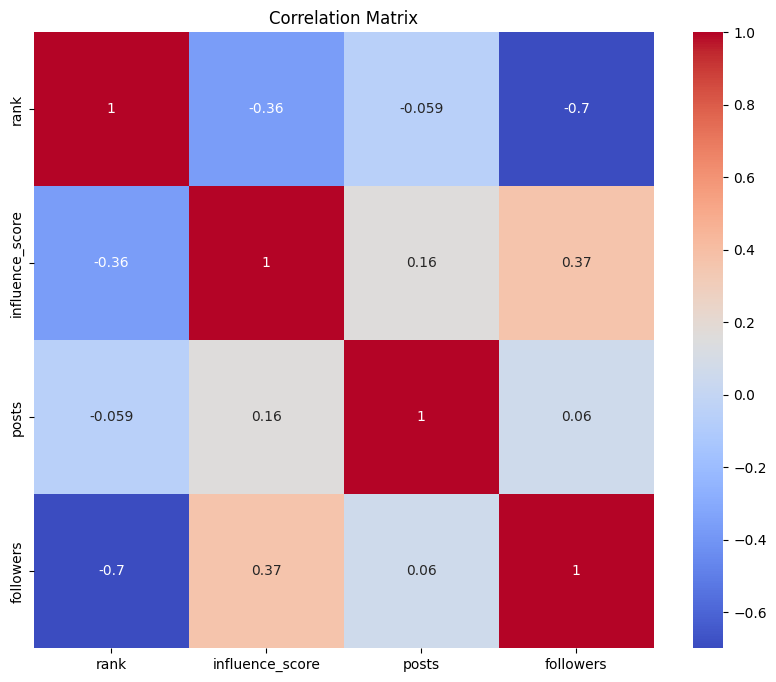

                     rank  influence_score     posts  followers
rank             1.000000        -0.362993 -0.059136  -0.698757
influence_score -0.362993         1.000000  0.160068   0.367713
posts           -0.059136         0.160068  1.000000   0.060398
followers       -0.698757         0.367713  0.060398   1.000000


In [103]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

# Relationships Between Variables:
The influence score has a moderate negative correlation with the rank, suggesting that as the influence score increases, the rank decreases.
There is a moderate positive correlation between the influence score and the number of followers, indicating that influencers with higher influence scores tend to have more followers.
The correlation between the rank and the number of followers is strongly negative, meaning that as the rank increases, the number of followers tends to decrease.

<ipython-input-104-a6fd50bb5e85>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='country', data=df, order=df['country'].value_counts().index, palette='viridis')


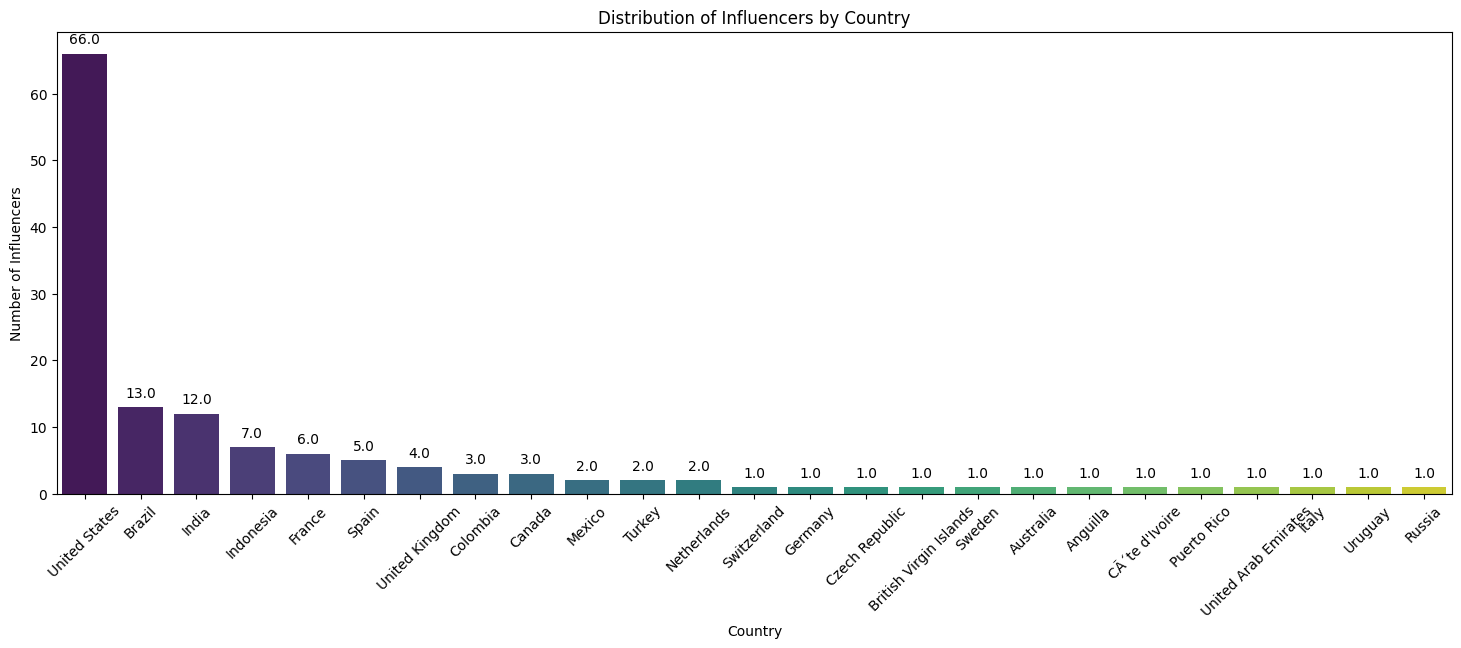

In [104]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x='country', data=df, order=df['country'].value_counts().index, palette='viridis')

# Add labels with the number on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.title('Distribution of Influencers by Country')
plt.xticks(rotation=45)  # Rotate labels on the x-axis for clarity
plt.show()


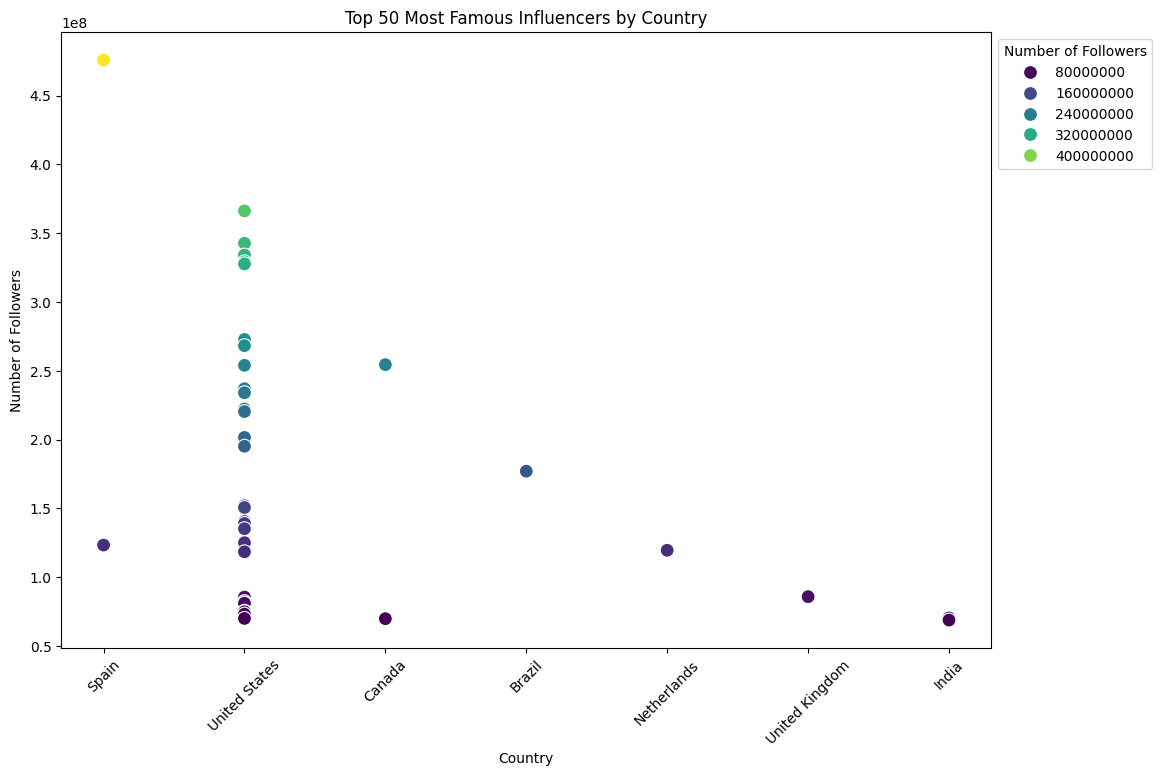

In [105]:
# Sort the DataFrame by the number of followers in descending order
top_50_users = df.sort_values(by='followers', ascending=False).head(50)

# Create a scatter plot to visualize the relationship between followers and country
plt.figure(figsize=(12, 8))
sns.scatterplot(x='country', y='followers', data=top_50_users, hue='followers', palette='viridis', s=100)
plt.xlabel('Country')
plt.ylabel('Number of Followers')
plt.title('Top 50 Most Famous Influencers by Country')
plt.xticks(rotation=45)  # Rotate labels on the x-axis for clarity
plt.legend(title='Number of Followers', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


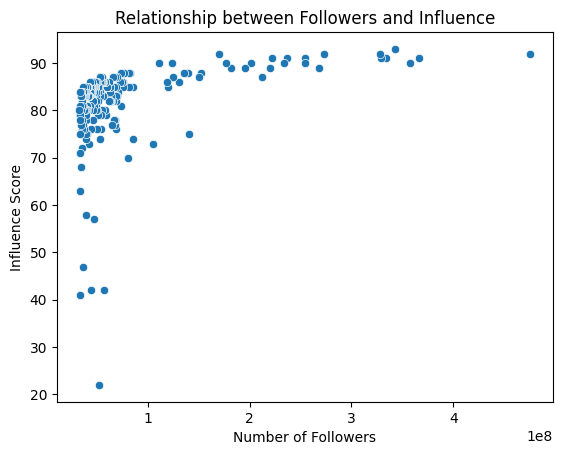

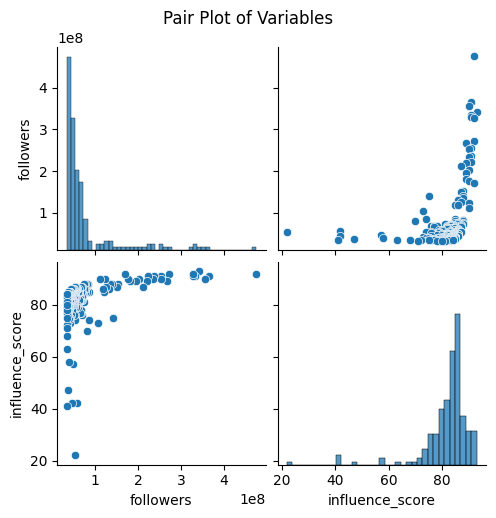

In [106]:
# Example for 'followers' and 'influence_score'
sns.scatterplot(x='followers', y='influence_score', data=df)
plt.xlabel('Number of Followers')
plt.ylabel('Influence Score')
plt.title('Relationship between Followers and Influence')
plt.show()

# Example for 'followers', 'influence_score', 'avg_likes', and 'total_likes'
sns.pairplot(df[['followers', 'influence_score', 'avg_likes', 'total_likes']])
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()


In [107]:
# Example for 'followers' as the dependent variable and 'influence_score' as independent
import statsmodels.api as sm

X = sm.add_constant(df['influence_score'])
y = df['followers']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              followers   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     30.96
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           8.48e-08
Time:                        20:59:56   Log-Likelihood:                -3891.8
No. Observations:                 200   AIC:                             7788.
Df Residuals:                     198   BIC:                             7794.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.723e+08   4.51e+07     

Regression Coefficients:
Intercept (const): The intercept is -1.723e+08, representing the estimated value of 'followers' when 'influence_score' is zero. In this context, it does not have a practically significant interpretation.

Coefficient of 'influence_score': The coefficient associated with 'influence_score' is 3.052e+06. It means that, on average, for each additional unit in 'influence_score', an increase of approximately 3.05 million in 'followers' is expected. This coefficient is statistically significant (p-value < 0.05).

Fit Statistics:
R-squared (R²): R² is 0.135, indicating that the model explains 13.5% of the variability in 'followers'. In other words, 'influence_score' explains 13.5% of the observed variability in the number of followers.

F-statistic: The F-value is 30.96 with a p-value of 8.48e-08. This suggests that at least one of the independent variables has a significant effect on 'followers'. The overall model is statistically significant.

Significance of Coefficients:
P>|t|: The p-values associated with the coefficients are very small (almost zero), indicating that both coefficients ('const' and 'influence_score') are statistically significant.

Limitations and Considerations:
The R-squared value is relatively low, suggesting that 'influence_score' alone does not explain much of the variability in 'followers'. There may be other variables not included in the model that also influence.

Causal interpretation should be approached with caution in observational analyses like this, as the relationship between 'influence_score' and 'followers' may be affected by other uncontrolled factors.

Assumptions of linear regression, such as linearity and absence of multicollinearity, should be evaluated.

Overall, this model provides an estimated linear relationship between 'influence_score' and 'followers', but the explanatory power is moderate, and there are other considerations to take into account when interpreting the results.

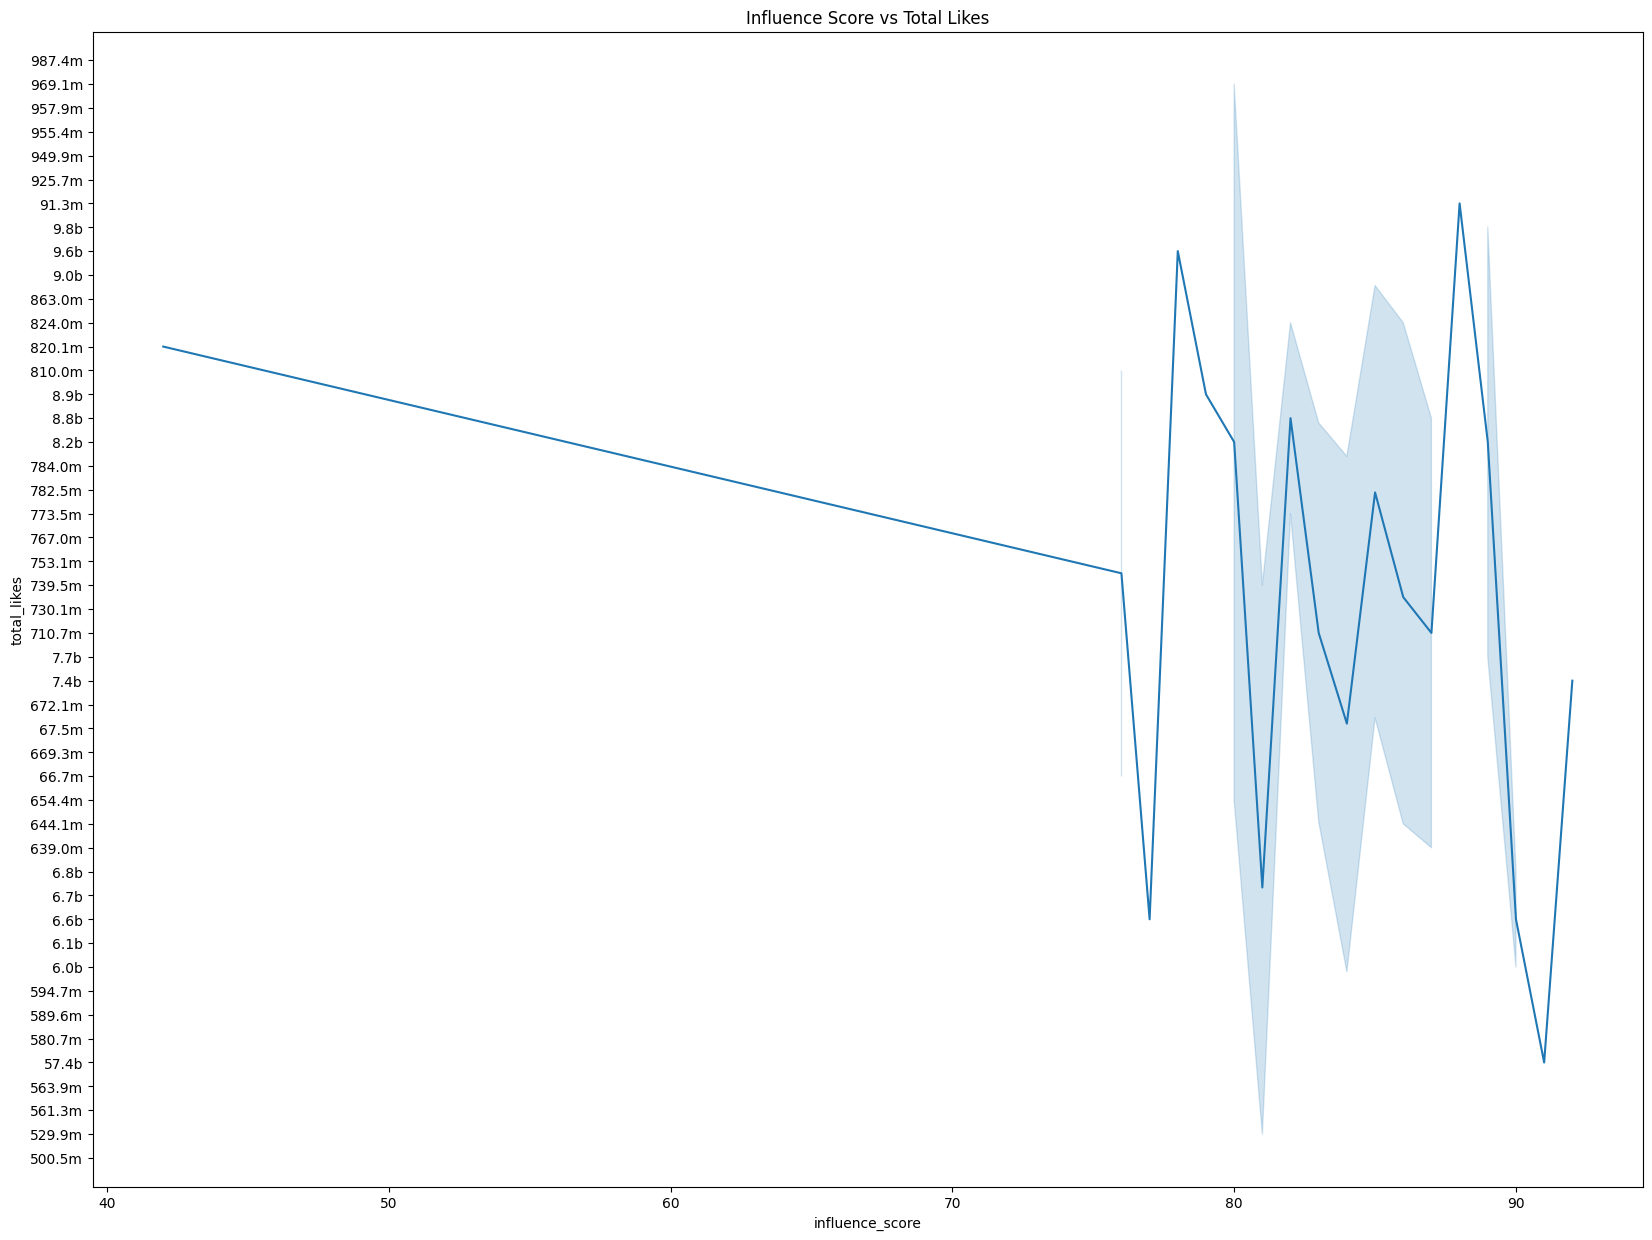

     rank        channel_info  influence_score  posts  followers avg_likes  \
102   103                 thv               83     60   49300000     15.4m   
199   200           raisa6690               80   4200   32799999    232.2k   
148   149         addisonraee               85    300   40100000      3.1m   
169   170       antogriezmann               83    870   36500000      1.1m   
132   133       hrithikroshan               85    580   43700000      1.6m   
126   127     vancityreynolds               86    680   44800000      1.4m   
24     25            ddlovato               88     80  139100000      1.1m   
8       9     khloekardashian               89   4100  268300000      2.4m   
65     66              maluma               84   8200   62800000      1.2m   
120   121         travisscott               78   3200   46200000      3.0m   
29     30       champagnepapi               85   5200  119600000      1.7m   
144   145                dior               85   9700   41500000

In [108]:
data_sorted = df.sort_values("total_likes", ascending=False)

# Select the top 50 posts with the most likes
top_50_posts = data_sorted.head(50)

# Create the plot
plt.figure(figsize=(20, 15))
plt.title("Influence Score vs Total Likes")
sns.lineplot(data=top_50_posts, x="influence_score", y="total_likes")
plt.show()

print(top_50_posts)

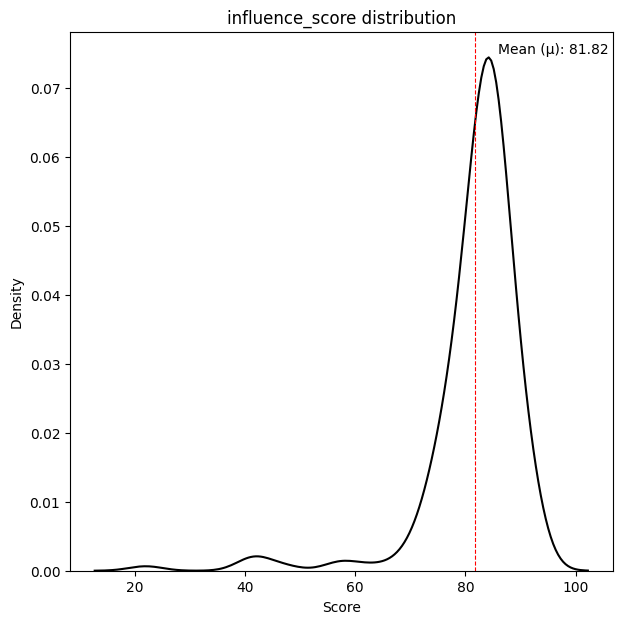

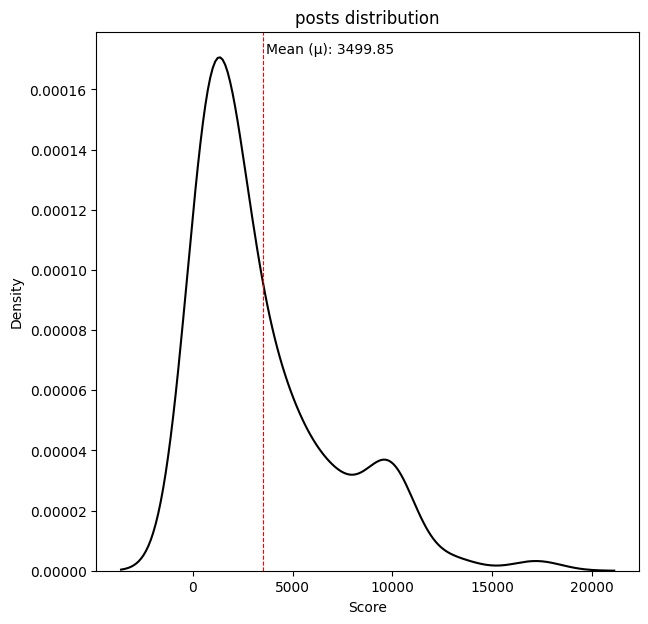

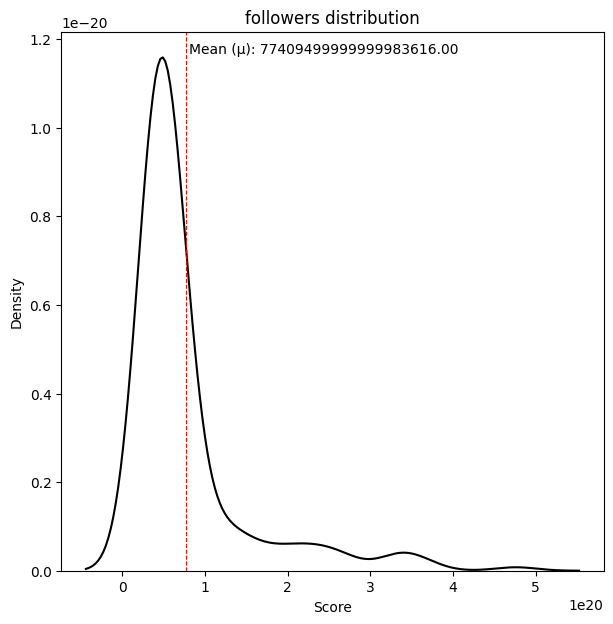

In [61]:
num_features=['influence_score','posts','followers']
for column_name in num_features:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} distribution".format(column_name = column_name))
  #sns.histplot(train[column_name], stat='density', color='#E6E6FA')
  sns.kdeplot(df[column_name], color='black')
  plt.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

`influence_score`:

The average influence score is approximately 81.82.
This value indicates the estimated influence measure of Instagram users in your dataset. A high value may suggest more influential users.

`posts`:

The average number of posts is approximately 3,499.85.
This value represents the average number of posts made by Instagram users in your dataset. It can indicate activity and presence on the platform.

`followers`:

The average number of followers is approximately 77,409,499,999 (77.4 billion).
This value suggests the average magnitude of users' reach in terms of followers. It shows how many people, on average, follow Instagram users in your dataset.